In [1]:
%%javascript
MathJax.Extension["TeX/cancel"]={version:"2.4.0",ALLOWED:{color:1,mathcolor:1,background:1,mathbackground:1,padding:1,thickness:1}};MathJax.Hub.Register.StartupHook("TeX Jax Ready",function(){var c=MathJax.InputJax.TeX,a=MathJax.ElementJax.mml,b=MathJax.Extension["TeX/cancel"];b.setAttributes=function(h,e){if(e!==""){e=e.replace(/ /g,"").split(/,/);for(var g=0,d=e.length;g<d;g++){var f=e[g].split(/[:=]/);if(b.ALLOWED[f[0]]){if(f[1]==="true"){f[1]=true}if(f[1]==="false"){f[1]=false}h[f[0]]=f[1]}}}return h};c.Definitions.Add({macros:{cancel:["Cancel",a.NOTATION.UPDIAGONALSTRIKE],bcancel:["Cancel",a.NOTATION.DOWNDIAGONALSTRIKE],xcancel:["Cancel",a.NOTATION.UPDIAGONALSTRIKE+" "+a.NOTATION.DOWNDIAGONALSTRIKE],cancelto:"CancelTo"}},null,true);c.Parse.Augment({Cancel:function(e,g){var d=this.GetBrackets(e,""),f=this.ParseArg(e);var h=b.setAttributes({notation:g},d);this.Push(a.menclose(f).With(h))},CancelTo:function(e,g){var i=this.ParseArg(e),d=this.GetBrackets(e,""),f=this.ParseArg(e);var h=b.setAttributes({notation:a.NOTATION.UPDIAGONALSTRIKE+" "+a.NOTATION.UPDIAGONALARROW},d);i=a.mpadded(i).With({depth:"-.1em",height:"+.1em",voffset:".1em"});this.Push(a.msup(a.menclose(f).With(h),i))}});MathJax.Hub.Startup.signal.Post("TeX cancel Ready")});MathJax.Ajax.loadComplete("[MathJax]/extensions/TeX/cancel.js");


<IPython.core.display.Javascript object>

# Aula 6

Vimos que o método direto (GEM) de resolução de sistemas lineares $Ax=b$ utiliza $O(\frac{2}{3} n^3)$ flops (operações de ponto flutuante).

Veremos nessa aula que se a matriz $A$ for simétrica, é possível reduzir essa complexidade a metade, ou seja, $O(\frac{1}{3} n^3)$.

O método GEM faz a decomposição LU, $A = LU$, onde a matriz $U$ pode ser decomposta em uma diagonal $D$ e $U'$ resultando em $A = LDU'$. Se $A$ é simétrica, $A = L D U'$,  $A = LDU' = A^T = U'^T D L^T$,  multiplicando a direita por $U^{-1}$ e a esquerda por $L^{-1}$ obtemos:
$$
L^{-1} \times \overbrace{LDU'}^{A} \times U'^{-1} = L^{-1} \times \overbrace{U'^T D L^T}^{A^T} \times U'^{-1} \\
D = (L^{-1} U'^T) D (L^T U'^{-1}) \implies L^{-1} U'^T = I \text{ e } L^T U'^{-1} = I \\
\text{logo}
\left\{
\begin{array}{c}
L^T = U' \\
L = U'^T
\end{array}
\right.
$$
Concluimos que $A = LDU'$ quando $A$ é simétrica fica $A = LDL^T$


O método utilizado nesse caso é o Cholesky, mas ele requer que além de simétrica, a matriz seja definida positiva (Symmetric Positive Definite **SPD**).


### Matrizes SPD

Há várias maneiras de definir que uma matriz é SPD, uma delas é pelo produto interno.

$A$ é SPD se $\langle Ax, x \rangle > 0, \forall x \neq 0$
$$
(Ax)_i = \left(\sum_{j=1}^n a_{ij} x_j\right)_i \implies \langle Ax, x \rangle = \sum_{i=1}^n \left(\sum_{j=1}^n a_{ij} x_j \right)_i \cdot x_i = \sum_{j=1}^n x_j \sum_{i=1}^n a_{ij} x_i = \sum_{j=1}^n x_j \displaystyle \underbrace{(A^T x)_j}_{ (A^T x)_i = \sum_{i=1}^n a_{ij} x_i\ } = \displaystyle \underbrace{\langle x, A^T x \rangle}_\text{auto-adjunta}   \\
\implies \langle Ax, x \rangle = \langle x, A^T x \rangle
$$

Outra propriedade de uma matriz $A$ SPD é que $a_{ii} > 0, \forall i$. Podemos chegar a isso fazendo $\langle A e_i, e_i \rangle = a_{ii} > 0$, onde $e_i$ é elemento da base canônica. Também temos que $\text{det}(A) > 0$, como exercício verifique que $\text{det}(A_k) > 0$ (dica: indução nas submatrizes principais).

Qualquer matriz SPD satisfaz as condições da decomposição LU. 

---

Um pequeno parenteses, uma matriz é dita ser diagonal dominante por linha se $\sum_{j=1, j \neq i}^n |a_{ij}| \leq |a_{ii}|$, e por coluna se $\sum_{i=1, i \neq j}^n |a_{ij}| \leq |a_{jj}|$.

**Exercicio:** Se $A$ é diagonal dominante, então GEM pode ser aplicado sem necessidade de pivotamento. (Provado no livro do Golub pg 120 seção 3.4.10, no futuro incluirei essa prova aqui).

---
Nesse ponto da aula eu me perguntei se matrizes SPD tem um número de condição baixo o que refletiria numa matriz "estável". O código abaixo é apenas para testar empiricamente essa suposição comparando SPD com matrizes aleatorias e uma matriz de hilbert. 

Seria interessante também verificar o alinhamento entre os autovetores de tais matrizes como uma maneira a mais de compará-las. No futuro farei isso.

Número de condição da matriz de hilbert de dimensão 100: 370740532976178823168


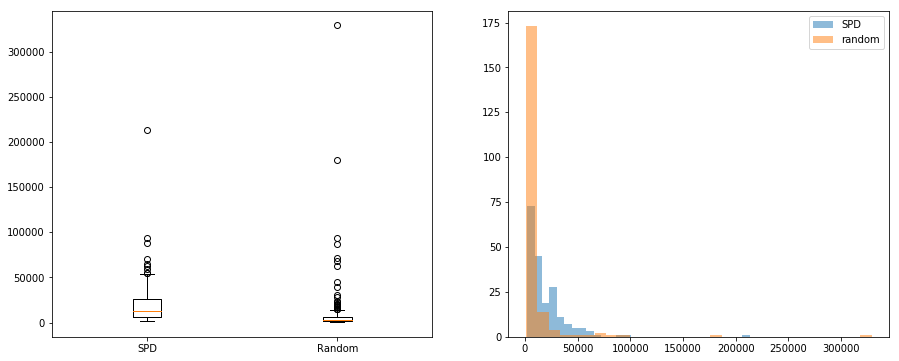

In [20]:
from sklearn.datasets import make_spd_matrix
import numpy as np
from matplotlib import pyplot as plt

dimension = 100
repetitions = 200
cond_n = np.zeros(shape=(2, repetitions))
for i in range(repetitions):
    # gera matrizes aleatoria simétricas e puramente aleatorias
    s_mat = make_spd_matrix(dimension)
    r_mat = np.random.rand(dimension, dimension)
    
    # calcula o condition number de ambas e salva num vetor
    cond_n[0, i] = np.linalg.cond(s_mat)
    cond_n[1, i] = np.linalg.cond(r_mat)

from scipy.linalg import hilbert
h_mat = hilbert(dimension)
print('Número de condição da matriz de hilbert de dimensão %d: %d'%(dimension, np.linalg.cond(h_mat)))

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.boxplot(x=[cond_n[0,:], cond_n[1,:]], labels=['SPD', 'Random'])

plt.subplot(1,2,2)
plt.hist(cond_n[0,:], bins=30, alpha=0.5, label='SPD')
plt.hist(cond_n[1, :], bins=30, alpha=0.5, label='random')
plt.legend(loc='upper right')
plt.show()

### Decomposição de Cholesky

Para uma dada matriz SPD (isso não funciona se a matriz for positiva semidefinida, é preciso que seja positiva definida), existe uma G (não única) triangular superior tal que $A = G^T G$.

$$
\begin{bmatrix}
    g_{11} & 0 & 0 & \dots  & 0 \\
    g_{12} & g_{22} & 0 & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    g_{1n} & g_{2n} & g_{3n} & \dots  & g_{nn}
\end{bmatrix} \begin{bmatrix}
    g_{11} & g_{12} & g_{13} & \dots  & g_{1n} \\
    0 & g_{22} & g_{23} & \dots  & g_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots  & g_{nn}
\end{bmatrix}  = 
\begin{bmatrix}
    a_{11} & a_{12} & a_{13} & \dots  & a_{1n} \\
    a_{12} & a_{22} & a_{23} & \dots  & a_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    a_{1n} & a_{2n} & a_{3n} & \dots  & a_{nn}
\end{bmatrix}
$$

Os elementos da diagonal dão vários graus de liberdade, por isso $G$ não é única.
$$
g_{11} \cdot g_{11} = a_{11}\\
(-g_{11}) (-g_{11}) = a_{11}
$$

Fixando a primeira linha de $G^T$ temos:
- $g_{11}^2 = a_{11} \implies g_{11} = \pm \sqrt{a_{11}}$
- $g_{11} \cdot g_{1j} = a_{1j} \implies g_{1j} = \displaystyle \frac{a_{1j}}{g_{11}}$

Fixando a segunda linha:
- $g_{12} \cdot g_{11} = \overbrace{a_{12}}^{\displaystyle a_{12} = a_{21}} \implies g_{12} = \displaystyle \frac{a_{12}}{g_{11}}$. Essa conta já foi feita no passo anterior, então precisamos continuar a partir de $g_{22}$

- $g_{12}^2 \cdot g_{22}^2 = a_{22} \implies g_{22} = \pm \sqrt{a_{22} - g_{12}^2}$. Essa raíz está bem definida pois o determinante da submatriz principal $A_2 > 0$, como $A$ é SPD temos que $\text{det}(A_k) >0$:
$$
a_{22} - g_{12}^2 = a_{22} - \frac{a_{12}^2}{g_{11}^2} = \frac{a_{11} \cdot a_{22} - a_{12}^2}{a_{11}} > 0, \text{ pois det}(A_2) >0 \text{ e det}(A_2) = \frac{a_{11} \cdot a_{22} - a_{12}^2}{a_{11}}  
$$

- Próximas colunas: $g_{12} \cdot \overbrace{g_{1j}}^\text{já calculado} + g_{22} \overbrace{g_{2j}}^\text{desconhecido} = a_{2j} \implies g_{2j} = \displaystyle \frac{a_{2j} - g_{12} \cdot g_{1j}}{g_{22}}, j=3 \ldots n$


Resumindo:

$i=1, \;\; g_{11} = \sqrt{a_{11}}, \;\; g_{1j} = \displaystyle \frac{a_{1j}}{g_{11}}, j=2 \ldots n$

$i=2, \;\; g_{22} = \sqrt{a_{22} - g_{12}^2}, \;\; g_{2j} = \displaystyle \frac{a_{2j} - g_{12} \cdot g_{1j} }{g_{22}}, j=3 \ldots n$

$\vdots$

$i=k, \;\; g_{1k}^2 + g_{2k}^2 + \cdots + g_{kk}^2 = a_{kk} \implies g_{kk} = \pm \sqrt{a_{kk} - \sum_{i=1}^{k-1} g_{ik}^2}$

Para $j>k g_{1k} \cdot g_{1j} + g_{2k} \cdot g_{2j} + \cdots + g_{kk} \cdot \overbrace{g_{kj}}^{desconhecido} = a_{kj} \implies $
$$ g_{kj} = \displaystyle  \frac{a_{kj} - \sum_{i=1}^{k-1} g_{ik} \cdot g_{ij} }{g_{kk}}, j=k+1, \ldots n $$

---

Com isso temos o seguinte algoritmo para a decomposição Cholesky:

ALGORITMO:
~~~
For K=1 to N
    S=0
    For I=1 to K-1
        S= S + G(I, K)^2
    END I
    G(K,K) = sqrt(A(K,K) - S) # computa elementos da diagonal
    For J=K+1 to N
        S=0
        For I=1 to K-1
            S = S + G(I,J) x G(I,K)
        END I
        G(K,J) = (A(K,J) - S / G(K,K))
    END J
END K
~~~


---
A complexidade desse algoritmo é $O(1/2 n^3)$ (exercício: verificar, assumir $\sqrt{~}$ utilize 1 flop) 

Com isso terminamos a parte dos métodos diretos de resolução de sistemas lineares, agora iremos para a parte de análise de erro.

---
### Análise de erro do GEM

O primeiro resultado dessa seção é um teorema que limita o erro relativo $\displaystyle \frac{\| \delta x \|}{\| x \|}$ em função da matrix $A$ e o vetor b, ou seja, o erro em função dos dados do problema.

**Teorema:** Seja $A_{n \times n}$ uma matriz não singular, e $\delta A$ tal que $\| A^{-1} \| \|\delta A \| < 1$, então se $x$ é solução de $Ax=b$ e $x + \delta x$ é solução de $(A + \delta A) (x + \delta x) = b + \delta b$ temos que:
$$
\frac{\| \delta x \|}{\|x\|} \leq \frac{K(A)}{1 - K(A) \frac{\| \delta A \|}{\|A\|}} \left( \frac{\| \delta b\|}{\|b\|} + \frac{\| \delta A \|}{\|A\|}\right).
$$

---
$K(A) = \|A\| \|A^{-1}\|$ é o número de condição (condition number), essa notação é para qualquer norma. Por exemplo:
$$
K_\infty(A) = \|A\|_\infty \|A^{-1}\|_\infty \\
K_2(A) = \|A\|_2 \|A^{-1}\|_2 = \frac{|\lambda_\text{max}|}{|\lambda_\text{min}|} \text{, pois }\\
\|A\|_2 = \sqrt{\rho(A^T A)} = \lambda_\text{max} = \text{max}(\lambda(A)) \text{ e }\\
\|A^{-1}\|_2 = \lambda_\text{min} = \text{min}(\lambda(A)) = \text{max}\left| \frac{1}{\lambda(A)} \right|
$$

Uma propriedade de $K(A)$ é que $K(A) = \|A\| \|A^{-1}\|>1$:
assumo norma que $1 = \|I\|$, lembrando que a norma de Frobenius não respeita essa propriedade $\left(\|A\|_F = \sqrt{\sum_i} a_{ij}^2 = \|I\|_F = \sqrt{n}\right.$, ela também não satisfaz $\left. \|A\| = \underset{\|x\|=1}{\max}\|Ax\| \right)$

Continuando $K(A)>1$
$$
1 = \|I\| = \|AA^{-1}\| \leq \|A\| \|A^{-1}\| = K(A)
$$

---
Para provar o teorema acima usaremos o seguinte resultado $\|A^{-1}\| \|\delta A\| <1 \implies (I + A^{-1} \delta A) $ é invertível.

Supondo $\|B\|<1 \implies I + B$ é invertível, ou seja, $(I+B)^{-1} = I + B + B^2+ \cdots$ (usando o argumento da soma de séries geométricas com razão menor que 1), com isso temos:
$$
\|(I + \overbrace{A^{-1}\delta  A}^{\|\cdot\|<1 \text{ pela suposição}})^{-1}\| \leq \frac{1}{1 - \|A^{-1} \delta A\|} \leq \frac{1}{1 - \|A^{-1}\| \| \delta A\|}
$$


**Prova do teorema acima:** 
Dado o sistema linear $Ax=b$, $A$ não singular e assumindo $\| A^{-1} \| \|\delta A \| < 1$ temos que:
$$
(A + \delta A) (x + \delta x) = b + \delta b \implies (A + \delta A)\delta x = b + \delta b - (A+\delta A)x \\
\delta x = \overbrace{(A + \delta A)^{-1}}^{\displaystyle A + \delta A = A\left(I + \frac{\delta A}{A}\right)} [b + \delta b - (A+\delta A)x] \\
\delta x = (A + \delta A)^{-1} [\cancel{b} + \delta b - \cancel{Ax} -\delta A x] \\
\delta x = (A + \delta A)^{-1} [+ \delta b - \delta A x] \\
\delta x = \left[A(I + A^{-1}\delta A)\right]^{-1} (\delta b - \delta A x) \\
\delta x = (I + A^{-1}\delta A)^{-1} A^{-1} (\delta b - \delta A x) \\
\text{tomando as normas} \\
\|\delta x\| \leq \|(I + A^{-1}\delta A)^{-1}\| \|A^{-1}\| \|(\delta b - \delta A x)\| \\
\|\delta x\| \leq \frac{1}{1 - \|A^{-1}\| \|\delta A\|} \|A^{-1}\| \overbrace{\|\delta b - \delta A x\|}^{\displaystyle \|\delta b - \delta A x\| \leq \|\delta b\| + \|\delta A\| \|x\|} \text{ dividindo por } \|x\| \\
\frac{\|\delta x\|}{\|x\|} \leq \frac{1}{1 - \|A^{-1}\| \|\delta A\|} \|A^{-1}\| \left( \frac{\|\delta b\|}{\|x\|} + \| \delta A\| \right) \\
\frac{\|\delta x\|}{\|x\|} \leq \frac{1}{1 - \|A^{-1}\| \|\delta A\|}  \left( \frac{\|\delta b\|}{\|A\|\|x\|} + \frac{\|\delta A\|}{\|A\|} \right),\\
\text{como } Ax=b \implies \|Ax\|=\|b\|, \|A\| \|x\| \leq \|b\|, \\
\frac{\|\delta x\|}{\|x\|} \leq \frac{K(A)}{1 - K(A)\ \frac{\|\delta A\|}{\|A\|}}  \left( \frac{\|\delta b\|}{\|b\|} + \frac{\|\delta A\|}{\|A\|} \right).
$$

QED

---



Esse teorema fornece que o erro relativo é limitado por uma constante vezes $K(A)$ vezes o erro nos dados $\left( \frac{\| \delta b\|}{\|b\|} + \frac{\| \delta A \|}{\|A\|}\right)$, pois assumindo que $\|A^{-1}\| \|\delta A\| <1$ temos:
$$
1- K(A)\frac{\|\delta A\|}{\|A\|} = 1 - \|A\| \|A^{-1}\| \frac{\|\delta A\|}{\|A\|} = 1 - \|A^{-1}\| \|\delta A\|,\\
\text{como } \|A^{-1}\| \|\delta A\| < 1 \implies \frac{K(A)}{1 - K(A) \frac{\| \delta A \|}{\|A\|}} = K(A) \cdot c,\; c >1
$$

Quando $K(A) >> 1$ a matriz $A$ é dita mal condicionada (Ill-conditioned).

Resultante do teorema acima temos o seguinte corolário:

**Corolário:** Se $\delta A = 0$, então $\displaystyle \frac{1}{K(A)} \frac{\| \delta b \|}{\|b\|} \leq \frac{\|\delta x\|}{\|x\|} \leq K(A) \frac{\|\delta b\|}{\|b\|}$
$$
A(x+\delta x) = b + \delta b \implies \cancel{Ax} + A\delta x = \cancel{b}+ \delta b \implies A \delta x = \delta b \implies \|\delta b\| \leq \|A\| \|\delta x\| \text{, multiplicando por } \|x\| \\
\|x\| \|\delta b\| \leq K(A) \|\delta x\| \|b\| \implies \frac{\|\delta b\|}{\|b\|} \leq K(A) \frac{\|\delta x\|}{\|x\|}
$$

---

O próximo teorema, dado no livro do Quarteroni (teorema 3.3) dá um limitante no erro relativo quando temos uma garantia do limitante do erro nos dados $\left(\|\delta A\|\right.$ e $\left.\|\delta b\|\right)$

**Teorema:** Assumindo
$$
\|\delta A\| \leq \Upsilon \|A\|, \Upsilon > 0\\
\|\delta b\| \leq \Upsilon \|b\| \text{ e } \Upsilon K(A) < 1
$$
então
$$
\frac{\|x + \delta x\|}{\|x\|} \leq \frac{1 + \Upsilon K(A)}{1 - \Upsilon K(A)} \implies \frac{\|\delta x\|}{\|x\|} \leq \frac{2 \Upsilon}{1- \Upsilon K(A)}.
$$

---
Esse teorema pode ser visto como uma analogia à limitação do erro quando aproximamos um número por sua representação em ponto flutuante $\left(\text{fl}(x)=(1+\delta)x, \delta \leq 1/2 \beta^{1-t}\right)$, é como se aplicássemos esse limitante da matriz $A$ a cada entrada da matrix $a_{ij}$ (element-wise). Comparo $\Upsilon$ a $\delta=1/2 \beta^{1-t}$, no caso $\Upsilon K(A)<1$, o erro é proporcional a $\Upsilon$. Se não tivessemos essa garantia de limitar o erro nos dados, poderíamos ter problema só para armazenar matrizes como a de Hilbert.

---

### Fontes de erros
Em sistemas lineares $Ax=b$, temos 3 fontes de erro:
1. Primeira fonte ocorre no armazenamento de $A$ e $b$ em representação de ponto flutuante, que é limitada pelo teorema anterior;
2. Erro devido à resolução dos sistemas: $\displaystyle \left\{\begin{array}{l} Ly=b \\ Ux=y\end{array}\right.$
3. Erro devido à decomposição LU ($A + \delta A = LU$)

---

Usaremos a seguinte notação 
$$
|A| = 
\begin{bmatrix}
    |a_{11}| & |a_{12}| & |a_{13}| & \dots  & |a_{1n}| \\
    |a_{12}| & |a_{22}| & |a_{23}| & \dots  & |a_{2n}| \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    |a_{1n}| & |a_{2n}| & |a_{3n}| & \dots  & |a_{nn}|
\end{bmatrix}, \;\; |A| < |B| \implies |a_{ij}| < |b_{ij}|
$$

---

Como o teorema já lidou com a primeira fonte de erro, iremos analisar o erro da segunda fonte de erro.

Dado o sistema $Ly=b$ consideramos que há um erro na matriz $L$, logo, $(L + \delta L) \tilde{y}=b$. Esse erro modela a solução exata ($\tilde{y}$) de um sistema aproximado ($L + \delta L$), onde queremos determinar um limitante para o erro da matriz $L$, $| \delta L | \leq n u |L| + o(u^2)$, $u= 1/2 \beta^{1-t}$. Interpretamos esse limitante como um limitante  element-wise dependendo da dimensão da matriz $n$, da precisão do ponto flutuante $u$, de cada entrada de $L$, e de um termo quadrático $u^2$ que é desconsiderado.

Lembrando que $L$ é triangular inferior com elementos da diagonal $1$, teremos o seguinte conjunto de equações para $Ly=b$ e depois considerando um erro em $L$ para $\tilde{y}$. Em cada operação de ponto flutuante conseraremos o erro de conversão $\text{fl}(x) = (1+\delta)x$. Os valores de $y$ abaixo com ~ são os valores estimados com erro na matriz $L$. 

$$
\begin{array}{lll}
Ly=b & (L + \delta L) \tilde{y} = b & \\
y_1 = b_1 & \to \tilde{y_1} = b_1 &\\
l_{21}y_1 + y_2 = b_2 & \to \tilde{y_2} = \text{fl}(b_2 - \text{fl}(l_{21}y_1)(1+\delta_1)) & = (b_2 - (l_{21}y_1)(1+\delta_1))(1+\delta_2)
\end{array} \\
\frac{\tilde{y}_2}{1+ \delta_2} = b_2 -(l_{21}y_1)(1+\delta_1) = \tilde{y_2} \cdot \underbrace{\sum_{n=1}^\infty (-1)^n (-\delta_2)^2}_{\text{expansão em série de potência de }\displaystyle \frac{\tilde{y}_2}{1 - (-\delta_2)}} \implies \\
b_2 - l_{21} \tilde{y}_1 - l_{21} \tilde{y}_1 \delta_1 = \tilde{y}_2 (1 - \delta_2 + \cancel{\delta_2^2 - \ldots})
$$
O último passo são desconsiderados elementos de $\delta_i$ com ordem mais que 1.
Como último exemplo faremos para $y_3$:
$$
y_3 = b_3 - (l_{31} \tilde{y}_1 + l_{32} \tilde{y}_2 ) \\
\tilde{y}_3 = [b_3 - (l_{31} \tilde{y}_1 (1+ \delta_1) + l_{32} \tilde{y}_2(1+ \delta_2) )(1+ \delta_3) ] (1+ \delta_4)\\
\text{desconsiderando os termos $\delta$ de ordem maior que 1 obteremos}\\
\frac{\tilde{y}_3}{1+\delta_4} = b_3 - l_{31}\tilde{y}_1 - l_{32}\tilde{y}_2  - l_{31}\tilde{y}_1 \delta_1 - l_{32}\tilde{y}_2 \delta_2  - l_{31}\tilde{y}_1 \delta_3 - l_{32}\tilde{y}_2 \delta_3
$$

Organizando o sistema acima em notação matricial obtemos:

$$
(L + \delta L)\tilde{y} = b \implies 
\left(\begin{bmatrix}
    1 & 0 & 0 & \dots  & 0 \\
    l_{21} & 1 & 0 & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    l_{n1} & l_{n2} & l_{n3} & \dots  & 1
\end{bmatrix} +
\begin{bmatrix}
    0 & 0 & 0 & \dots  & 0 \\
    \delta_1 l_{21} & -\delta_2 & 0 & \dots  & 0 \\
    -(\delta_1 l_{31} + \delta_3 l_{31} ) & 1(\delta_2 l_{32} + \delta_4 l_{32}) & 1 & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
\end{bmatrix} \right)
\begin{bmatrix}
    \tilde{y_1} \\
    \tilde{y_2} \\
    \vdots \\
    \tilde{y_n} \\
\end{bmatrix} = 
\begin{bmatrix}
    b_1 \\
    b_2 \\
    \vdots \\
    b_n \\
\end{bmatrix}
$$




O seguinte lema é usado para obter o limitante acima, é deixado como exercício provar (dica: tentar por indução na dimensão da matriz)

**Lema:** $\text{fl}\left(\sum_{m=1}^d x_m y_m\right) = \sum_{m=1}^d (x_m y_m)(1+ \delta_m), |\delta_m| \leq \delta u$

Com isso podemos ver que cada entrada da matriz $\delta L$ é limitada $n$ vezes o elemento de $L$ correspondente vezes $u$ que é um limitante para $\delta$.
